# Two Sine Waves with Different Frequencies

In this example, we will generate two sine waves with different frequencies and add them together. We will then plot the resulting signal in the time domain and in the frequency domain.

## Import Required Libraries

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

## Define the Parameters such as the Sampling Frequency, the Duration of the Signal, and the Frequencies of the Sine Waves

In [2]:
# Variables
sRate = 20000 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
amplitude2 = 5 # amplitude of second wave
numPeriods = 10 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

## Create Plotting Helper Function

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## Generate the X-Axis for the Time Domain Signal

The X-axis for the time domain signal will be generated using the `numpy` library. 

To generate the X-axis for the time domain signal, we will use the `numpy.linspace` function. This function generates an array of evenly spaced numbers over a specified interval. 

The function takes three arguments: `start`, `stop`, and `num`. The `start` argument specifies the starting value of the sequence, the `stop` argument specifies the end value of the sequence, and the `num` argument specifies the number of samples to generate.

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

Display the first 10 values of the X-axis for the time domain signal.

In [5]:
x[:10]

array([0.0000000e+00, 5.0000250e-05, 1.0000050e-04, 1.5000075e-04,
       2.0000100e-04, 2.5000125e-04, 3.0000150e-04, 3.5000175e-04,
       4.0000200e-04, 4.5000225e-04])

Print out the length of x to make sure it is numSamples long.

In [6]:
len(x)

200000

## Generate the Sine Waves

f1 and f2 are the first and second sine waves, respectively, that will be generated.  We use a lambda function to generate the sine waves.  The lambda function takes the time axis and returns the sine wave.

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)

Use list comprehension to generate the first sine wave.  The first sine wave is generated by applying the lambda function to each value in the time axis.

In [9]:
sampled_f1 = [f1(i) for i in x]

Check the length of the first sine wave to make sure it is numSamples long.a

In [10]:
len(sampled_f1)

200000

Likewise, we can create the second sine wave by applying the lambda function f2 to each value in the time axis.

In [11]:
sampled_f2 = [f2(i) for i in x]

## Add the Two Sine Wave Signals Together

To generate the combined signal, we simply add the two sine wave signals together.

In [12]:
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

Check the length of the combined signal to make sure it is numSamples long.

In [13]:
len(sampled_fcomb)

200000

## Plot the Time Domain Signals

Now we plot the time domain signals.  We will plot the first sine wave, the second sine wave, and the combined signal.

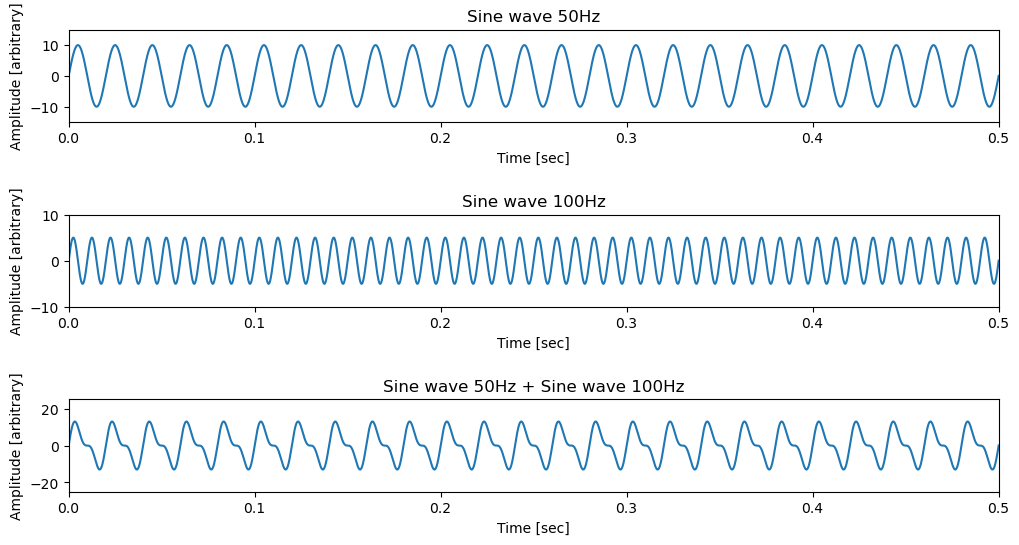

In [14]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 50Hz + Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-25, 25)
fig.savefig('../images/2_sine_waves_100_Hz_50_Hz.png', dpi=300)

## Calculate the Fourier Transform of the Combined Signal

To calculate the Fourier transform of the combined signal, we use the `numpy.fft.fft` function. This function computes the one-dimensional discrete Fourier Transform.

The function takes the combined signal as an argument and returns the Fourier transform of the signal.

To obtain the magnitude of the Fourier transform, we square the real parts and the imaginary parts of the Fourier transform and take the square root of the sum of the squares.  The is done for everly element in the Fourier transform.

To generate the X-axis for the frequency domain signal, we create a list of frequencies that correspond to the Fourier transform of the combined signal.  The frequencies are generated using the `numpy.fft.fftfreq` function.  This function generates the frequencies for the Fourier transform of the signal.

The function takes the number of samples and the sampling frequency as arguments and returns an array of frequencies.

In [15]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]

frequencies = np.fft.fftfreq(len(fft_output), 2/sRate)dd

SyntaxError: invalid syntax (4128351882.py, line 4)

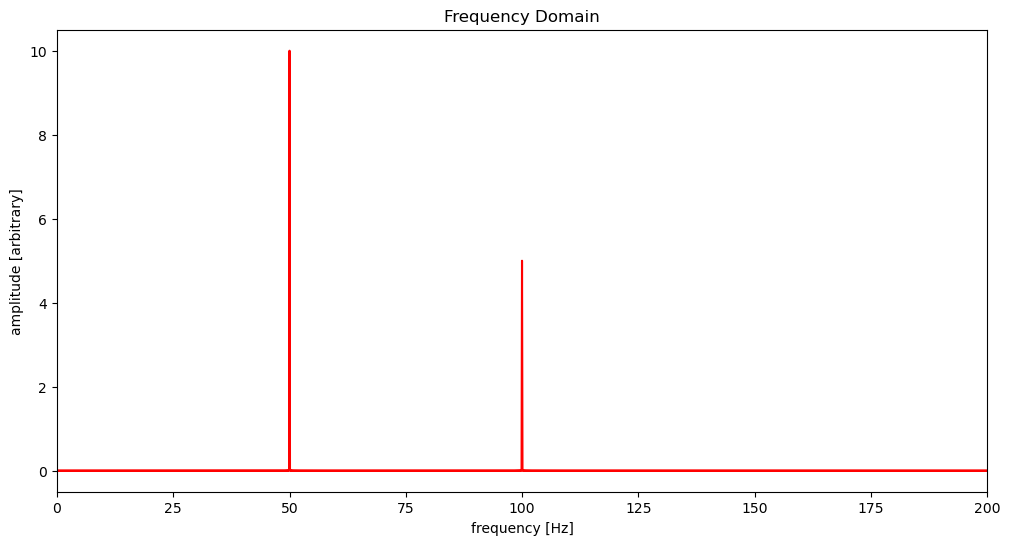

In [91]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 200)
plt.plot(frequencies, magnitude, 'r')


Check the length of the magnitude and the frequencies to make sure they are the same length.

In [93]:
len(magnitude)

100001

In [94]:
len(frequencies)

100001

## Generate Output Files

Save the magnitude and the frequencies to files.  These files will be processed through the DFFT Fortran program.  The output of the program will be compared to the magnitude and frequencies generated by the Python program.

In [95]:
print ('Opening data files...')
dataFile = open('2sineXHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('2sineXHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('2sineXHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, sampled_fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([sampled_fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...


## Execute DFFT Fortran Program

The DFFT Fortran program will be executed on the data file that contains the time domain data of the combined signal.  The program will output the magnitude and phase of the Fourier transform of the signal into two separate files: DFFT_mag_file.dat and DFFT_phase_file.dat.

In [103]:
import os
exec_status = os.system("./dfft 2sineXHz.dat DFFT_mag_file.dat DFFT_phase_file.dat 20000 10 > log.txt")